# Importy

In [17]:
!python --version

Python 3.12.0


In [18]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [19]:
os.getcwd()

'c:\\Users\\klips\\Documents\\PJATK\\7 - Zimowy\\SUML\\suml-lab-ClipLee'

# Zadanie 1

*Załaduj ponownie zbiór danych (DSP_6.csv), ale nie wykonuj jeszcze operacji na brakujących wartościach. Poszukaj innego sposobu wyświetlenia informacji o brakujących wartościach -wyświetl liczbę brakujących danych.*

In [20]:
df = pd.read_csv("Lab03/datasets/DSP_6.csv")

In [21]:
print('Sposob isnull: ', df.isnull().sum(), '\n')
print('Sposob isna: ', df.isna().sum(), '\n')
print('Sposob notnull:\n','W tablicy nie ma wartosci brakujacych: ', df.notnull().all().all())

Sposob isnull:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Sposob isna:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Sposob notnull:
 W tablicy nie ma wartosci brakujacych:  False


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Zadanie 2

*Dodaj kilka kolejnych wykresów w celu dalszej eksploracji danych. Stwórz wykres, który będzie pokazywać informację dotyczącą liczby członków rodziny na pokładzie. Stwórz wykres, który będzie pokazywać informację dotyczącą opłaty, która została uiszczona przez pasażerów. Z uwagi na to, że dane te zawierają przypadki odstające zmień jego wielkość za pomocą parametru figsize.*

In [23]:
# Wyświetlenie liczby członków rodziny na pokładzie
df["Liczba członków rodziny"] = df["SibSp"] + df["Parch"]

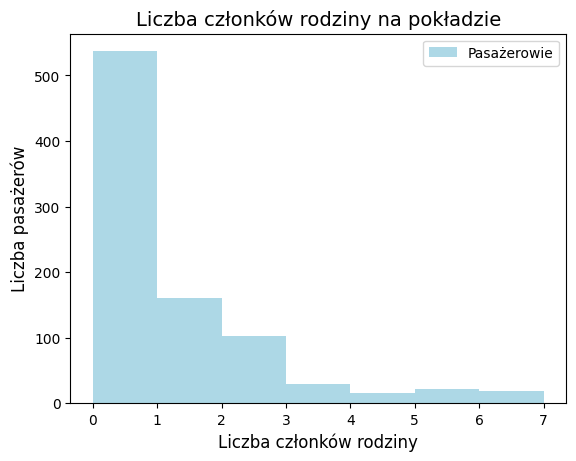

In [24]:
plt.hist(df["Liczba członków rodziny"],
         bins=range(0, 8),
         color="lightblue")
plt.title("Liczba członków rodziny na pokładzie", fontsize=14)
plt.xlabel("Liczba członków rodziny", fontsize=12)
plt.ylabel("Liczba pasażerów", fontsize=12)
plt.xticks(range(0, 8))
plt.legend(["Pasażerowie"], loc="upper right")

plt.show()


Text(0.5, 1.0, 'Rozkład opłat za bilety')

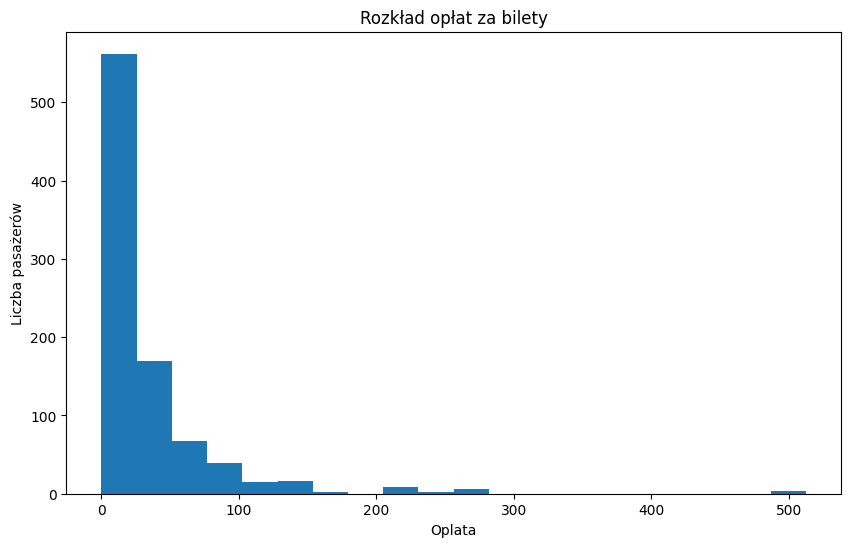

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=20)
plt.xlabel('Oplata')
plt.ylabel('Liczba pasażerów')
plt.title('Rozkład opłat za bilety')

# Zadanie 3

*Spróbuj wytrenować nowy model regresji logistycznej dla tych samych danych. Tym razem zrób wcześniej błąd i nie dokonuj transformacji zmiennych (po prostu załaduj data frame, usuń przypadki odstające i spróbuj je zastosować do modelu). Jaki błąd otrzymujesz? Załaduj ponownie  model,  tym  razem  poprawnie,  ale  wytrenuj  model  dwukrotnie  modyfikując 
wybrane hiperparametry (test_size, random_state lub max_iter). Czy coś się zmienia w parametrach modelu?*

## Bez transformacji

In [26]:
df = pd.read_csv("Lab03/datasets/DSP_6.csv")

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

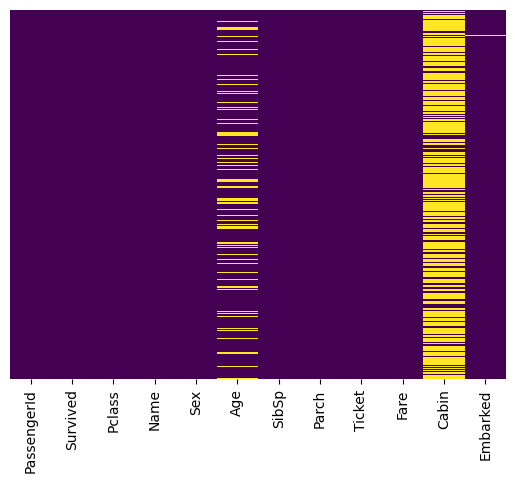

In [28]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [29]:
# Usuń przypadki odstające
df = df[df["Fare"] <= 500]

# Wytrenuj model
model = LogisticRegression()
model.fit(df[["Sex", "Age", "SibSp", "Parch", "Pclass", "Embarked"]], df["Survived"])

# Wyświetl parametry modelu
print(model.coef_)
print(model.intercept_)

ValueError: could not convert string to float: 'male'

Występuje następujący błąd: `ValueError: could not convert string to float: 'male'
`

## Z transformacją

In [30]:
df = pd.read_csv("Lab03/datasets/DSP_6.csv")

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
if "Fare" not in df.columns:
    print("Kolumna 'Fare' nie istnieje w DataFrame.")
    exit()

if df["Fare"].isnull().all():
    print("Kolumna 'Fare' zawiera same wartości null.")
    exit()


In [33]:
# Usuwam przypadki odstające
df = df[df["Fare"] <= 500]

### Transformacja danych

In [34]:
sex = pd.get_dummies(df["Sex"], drop_first=True)

In [35]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [38]:
df["Age"] = df["Age"].astype("float")
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)
df["Embarked"] = df["Embarked"].astype("category")

In [40]:
# Wytrenuj model
model = LogisticRegression()
model.fit(df[["Sex", "Age", "SibSp", "Parch", "Pclass", "Embarked"]], df["Survived"])

# Wyświetl parametry modelu
print(model.coef_)
print(model.intercept_)

ValueError: Cannot cast object dtype to float64

# Zadanie 4